In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import os.path as path
import itertools
from sklearn.preprocessing import maxabs_scale

In [2]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Input,InputLayer, Dense, Activation, BatchNormalization, Flatten, Conv1D
from tensorflow.keras.layers import MaxPooling1D, Dropout
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint,LearningRateScheduler, \
                                        EarlyStopping
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical

In [3]:
os.environ['CUDA_VISIBLE_DEVICES'] = '2'

In [4]:
base_dir = path.join('..', 'data')
data_dir = path.join(base_dir, 'data_speech_commands_v0.02')
 
train_txt = path.join(data_dir, 'wav_train_16words.txt')
val_txt = path.join(data_dir, 'wav_validation_16words.txt')
test_txt = path.join(data_dir, 'wav_test_16words.txt')

train_data = np.load(path.join(data_dir, 'wav_train_data.npz'))
val_data = np.load(path.join(data_dir, 'wav_validation_data.npz'))
test_data = np.load(path.join(data_dir, 'wav_test_data.npz'))

In [5]:
x_train = train_data['x_train']
y_train = train_data['y_train']
x_val = val_data['x_val']
y_val = val_data['y_val']
x_test = test_data['x_test']
y_test = test_data['y_test']
y_table = test_data['table']

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape, y_table.shape

((36805, 16000, 1),
 (36805,),
 (4293, 16000, 1),
 (4293,),
 (4815, 16000, 1),
 (4815,),
 (16, 2))

In [6]:
input_shape = x_test[0].shape
output_size = y_table.shape[0]

In [7]:
x_train_abs = np.asarray([maxabs_scale(wav) for wav in x_train])
y_train_onehot = np.asarray([to_categorical(label, output_size) for label in y_train])
del x_train, y_train

x_val_abs = np.asarray([maxabs_scale(wav) for wav in x_val])
y_val_onehot = np.asarray([to_categorical(label, output_size) for label in y_val])
del x_val, y_val

x_test_abs = np.asarray([maxabs_scale(wav) for wav in x_test])
y_test_onehot = np.asarray([to_categorical(label, output_size) for label in y_test])
del x_test, y_test

In [8]:
def build_1d_cnn_custom_DO_BN(conv_num=1):
    model=Sequential()
    model.add(Conv1D (kernel_size=5, filters=64, strides=1, padding='same', input_shape=input_shape)) 
    model.add(BatchNormalization())
    model.add(Activation('relu'))
#     model.add(MaxPooling1D(pool_size=3, strides=3, padding='same'))
    
    for i in range(conv_num-1):
        model.add(Conv1D (kernel_size=5, filters=64*(2**int((i+1)/4)), 
                          strides=1, padding='same'))
        model.add(BatchNormalization())
        model.add(Activation('relu'))
        model.add(MaxPooling1D(pool_size=2, strides=2))

    model.add(Flatten())
    
    model.add(Dropout(0.5))
    model.add(Dense(output_size, activation='softmax' ))
    
    return model

In [9]:
for i in range(3, 14):
    model = build_1d_cnn_custom_DO_BN(conv_num=i)
    model.summary()
    del model

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 16000, 64)         384       
_________________________________________________________________
batch_normalization_v1 (Batc (None, 16000, 64)         256       
_________________________________________________________________
activation (Activation)      (None, 16000, 64)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 16000, 64)         20544     
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 16000, 64)         256       
_________________________________________________________________
activation_1 (Activat

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 16000, 64)         384       
_________________________________________________________________
batch_normalization_v1_12 (B (None, 16000, 64)         256       
_________________________________________________________________
activation_12 (Activation)   (None, 16000, 64)         0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 16000, 64)         20544     
_________________________________________________________________
batch_normalization_v1_13 (B (None, 16000, 64)         256       
_________________________________________________________________
activation_13 (Activation)   (None, 16000, 64)         0         
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 8000, 64)          0         
__________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_33 (Conv1D)           (None, 16000, 64)         384       
_________________________________________________________________
batch_normalization_v1_33 (B (None, 16000, 64)         256       
_________________________________________________________________
activation_33 (Activation)   (None, 16000, 64)         0         
_________________________________________________________________
conv1d_34 (Conv1D)           (None, 16000, 64)         20544     
_________________________________________________________________
batch_normalization_v1_34 (B (None, 16000, 64)         256       
_________________________________________________________________
activation_34 (Activation)   (None, 16000, 64)         0         
_________________________________________________________________
max_pooling1d_27 (MaxPooling (None, 8000, 64)          0         
__________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_52 (Conv1D)           (None, 16000, 64)         384       
_________________________________________________________________
batch_normalization_v1_52 (B (None, 16000, 64)         256       
_________________________________________________________________
activation_52 (Activation)   (None, 16000, 64)         0         
_________________________________________________________________
conv1d_53 (Conv1D)           (None, 16000, 64)         20544     
_________________________________________________________________
batch_normalization_v1_53 (B (None, 16000, 64)         256       
_________________________________________________________________
activation_53 (Activation)   (None, 16000, 64)         0         
_________________________________________________________________
max_pooling1d_44 (MaxPooling (None, 8000, 64)          0         
__________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_75 (Conv1D)           (None, 16000, 64)         384       
_________________________________________________________________
batch_normalization_v1_75 (B (None, 16000, 64)         256       
_________________________________________________________________
activation_75 (Activation)   (None, 16000, 64)         0         
_________________________________________________________________
conv1d_76 (Conv1D)           (None, 16000, 64)         20544     
_________________________________________________________________
batch_normalization_v1_76 (B (None, 16000, 64)         256       
_________________________________________________________________
activation_76 (Activation)   (None, 16000, 64)         0         
_________________________________________________________________
max_pooling1d_65 (MaxPooling (None, 8000, 64)          0         
__________

Train on 36805 samples, validate on 4293 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 2.8980 - acc: 0.3338
Epoch 00001: val_loss improved from inf to 2.87125, saving model to model/checkpoint/1D_CNN_custom_pool_2_DO_BN_3_conv_checkpoint/001-2.8713.hdf5
36805/36805 [==============================] - 95s 3ms/sample - loss: 2.8981 - acc: 0.3337 - val_loss: 2.8713 - val_acc: 0.2956
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.9906 - acc: 0.5322
Epoch 00002: val_loss improved from 2.87125 to 2.39675, saving model to model/checkpoint/1D_CNN_custom_pool_2_DO_BN_3_conv_checkpoint/002-2.3967.hdf5
36805/36805 [==============================] - 90s 2ms/sample - loss: 1.9904 - acc: 0.5322 - val_loss: 2.3967 - val_acc: 0.4435
Epoch 3/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.5874 - acc: 0.6396
Epoch 00003: val_loss did not improve from 2.39675
36805/36805 

Epoch 29/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.6102 - acc: 0.9420
Epoch 00029: val_loss did not improve from 2.39675
36805/36805 [==============================] - 88s 2ms/sample - loss: 0.6101 - acc: 0.9420 - val_loss: 3.9890 - val_acc: 0.5155
Epoch 30/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.6120 - acc: 0.9427
Epoch 00030: val_loss did not improve from 2.39675
36805/36805 [==============================] - 88s 2ms/sample - loss: 0.6119 - acc: 0.9428 - val_loss: 4.0366 - val_acc: 0.5064
Epoch 31/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.6066 - acc: 0.9434
Epoch 00031: val_loss did not improve from 2.39675
36805/36805 [==============================] - 88s 2ms/sample - loss: 0.6065 - acc: 0.9434 - val_loss: 3.8892 - val_acc: 0.5176
Epoch 32/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.6042 - acc: 0.9443
Epoch 00032: val_loss did not improve from 2.39675
36805/36805 [===========

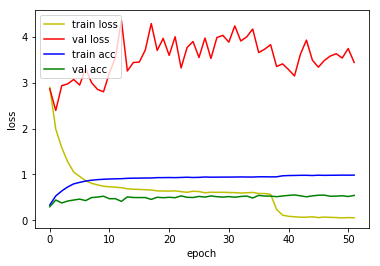

4815/4815 [==============================] - 5s 986us/sample - loss: 2.6129 - acc: 0.3994
Loss: 2.6129125837720197 Accuracy: 0.39937696

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 2.2803 - acc: 0.3623
Epoch 00001: val_loss improved from inf to 1.70460, saving model to model/checkpoint/1D_CNN_custom_pool_2_DO_BN_4_conv_checkpoint/001-1.7046.hdf5
36805/36805 [==============================] - 102s 3ms/sample - loss: 2.2802 - acc: 0.3623 - val_loss: 1.7046 - val_acc: 0.4535
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.4414 - acc: 0.5675
Epoch 00002: val_loss improved from 1.70460 to 1.65134, saving model to model/checkpoint/1D_CNN_custom_pool_2_DO_BN_4_conv_checkpoint/002-1.6513.hdf5
36805/36805 [==============================] - 96s 3ms/sample - loss: 1.4412 - acc: 0.5675 - val_loss: 1.6513 - val_acc: 0.5199
Epoch 3/500
36800/36805 [============================>.] - ETA: 0s - 

Epoch 29/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0959 - acc: 0.9719
Epoch 00029: val_loss did not improve from 1.32853
36805/36805 [==============================] - 96s 3ms/sample - loss: 0.0959 - acc: 0.9719 - val_loss: 2.0429 - val_acc: 0.6550
Epoch 30/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0987 - acc: 0.9718
Epoch 00030: val_loss did not improve from 1.32853
36805/36805 [==============================] - 96s 3ms/sample - loss: 0.0987 - acc: 0.9719 - val_loss: 2.0750 - val_acc: 0.6494
Epoch 31/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0945 - acc: 0.9721
Epoch 00031: val_loss did not improve from 1.32853
36805/36805 [==============================] - 96s 3ms/sample - loss: 0.0945 - acc: 0.9721 - val_loss: 2.5106 - val_acc: 0.5863
Epoch 32/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0842 - acc: 0.9761
Epoch 00032: val_loss did not improve from 1.32853
36805/36805 [===========

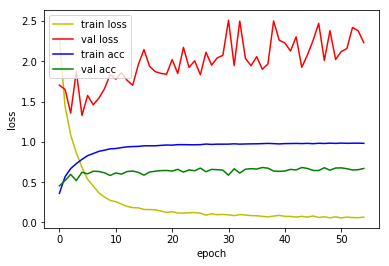

4815/4815 [==============================] - 5s 1ms/sample - loss: 1.4578 - acc: 0.5961
Loss: 1.4578398395302634 Accuracy: 0.596054

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 2.1267 - acc: 0.4005
Epoch 00001: val_loss improved from inf to 1.53038, saving model to model/checkpoint/1D_CNN_custom_pool_2_DO_BN_5_conv_checkpoint/001-1.5304.hdf5
36805/36805 [==============================] - 113s 3ms/sample - loss: 2.1267 - acc: 0.4005 - val_loss: 1.5304 - val_acc: 0.5227
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.3231 - acc: 0.6052
Epoch 00002: val_loss improved from 1.53038 to 1.31169, saving model to model/checkpoint/1D_CNN_custom_pool_2_DO_BN_5_conv_checkpoint/002-1.3117.hdf5
36805/36805 [==============================] - 106s 3ms/sample - loss: 1.3233 - acc: 0.6052 - val_loss: 1.3117 - val_acc: 0.6028
Epoch 3/500
36800/36805 [============================>.] - ETA: 0s - los

Epoch 29/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0921 - acc: 0.9737
Epoch 00029: val_loss did not improve from 1.19789
36805/36805 [==============================] - 105s 3ms/sample - loss: 0.0921 - acc: 0.9737 - val_loss: 1.7919 - val_acc: 0.7091
Epoch 30/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0912 - acc: 0.9726
Epoch 00030: val_loss did not improve from 1.19789
36805/36805 [==============================] - 105s 3ms/sample - loss: 0.0912 - acc: 0.9725 - val_loss: 1.6187 - val_acc: 0.7163
Epoch 31/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0930 - acc: 0.9729
Epoch 00031: val_loss did not improve from 1.19789
36805/36805 [==============================] - 106s 3ms/sample - loss: 0.0929 - acc: 0.9729 - val_loss: 1.5948 - val_acc: 0.7223
Epoch 32/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0755 - acc: 0.9778
Epoch 00032: val_loss did not improve from 1.19789
36805/36805 [========

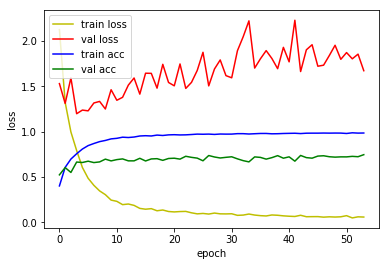

4815/4815 [==============================] - 5s 1ms/sample - loss: 1.3127 - acc: 0.6222
Loss: 1.3126934542710411 Accuracy: 0.62222224

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.9610 - acc: 0.4175
Epoch 00001: val_loss improved from inf to 1.64942, saving model to model/checkpoint/1D_CNN_custom_pool_2_DO_BN_6_conv_checkpoint/001-1.6494.hdf5
36805/36805 [==============================] - 122s 3ms/sample - loss: 1.9611 - acc: 0.4174 - val_loss: 1.6494 - val_acc: 0.4580
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.2200 - acc: 0.6243
Epoch 00002: val_loss improved from 1.64942 to 1.04211, saving model to model/checkpoint/1D_CNN_custom_pool_2_DO_BN_6_conv_checkpoint/002-1.0421.hdf5
36805/36805 [==============================] - 110s 3ms/sample - loss: 1.2201 - acc: 0.6243 - val_loss: 1.0421 - val_acc: 0.6748
Epoch 3/500
36800/36805 [============================>.] - ETA: 0s - l

36800/36805 [============================>.] - ETA: 0s - loss: 0.1020 - acc: 0.9682
Epoch 00028: val_loss did not improve from 0.79291
36805/36805 [==============================] - 110s 3ms/sample - loss: 0.1019 - acc: 0.9682 - val_loss: 1.2087 - val_acc: 0.7768
Epoch 29/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1033 - acc: 0.9674
Epoch 00029: val_loss did not improve from 0.79291
36805/36805 [==============================] - 110s 3ms/sample - loss: 0.1033 - acc: 0.9673 - val_loss: 1.1701 - val_acc: 0.7608
Epoch 30/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1057 - acc: 0.9675
Epoch 00030: val_loss did not improve from 0.79291
36805/36805 [==============================] - 110s 3ms/sample - loss: 0.1060 - acc: 0.9675 - val_loss: 1.1203 - val_acc: 0.7927
Epoch 31/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1126 - acc: 0.9649
Epoch 00031: val_loss did not improve from 0.79291
36805/36805 [=====================


1D_CNN_custom_pool_2_DO_BN_6_conv Model


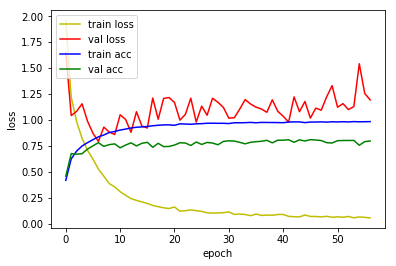

4815/4815 [==============================] - 6s 1ms/sample - loss: 0.8866 - acc: 0.7371
Loss: 0.8865547987035749 Accuracy: 0.73707163

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.8543 - acc: 0.4365
Epoch 00001: val_loss improved from inf to 1.42687, saving model to model/checkpoint/1D_CNN_custom_pool_2_DO_BN_7_conv_checkpoint/001-1.4269.hdf5
36805/36805 [==============================] - 129s 4ms/sample - loss: 1.8541 - acc: 0.4365 - val_loss: 1.4269 - val_acc: 0.5451
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.1212 - acc: 0.6545
Epoch 00002: val_loss improved from 1.42687 to 0.91425, saving model to model/checkpoint/1D_CNN_custom_pool_2_DO_BN_7_conv_checkpoint/002-0.9142.hdf5
36805/36805 [==============================] - 113s 3ms/sample - loss: 1.1215 - acc: 0.6544 - val_loss: 0.9142 - val_acc: 0.7254
Epoch 3/500
36800/36805 [============================>.] - ETA: 0s - l

Epoch 28/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1252 - acc: 0.9597
Epoch 00028: val_loss did not improve from 0.59708
36805/36805 [==============================] - 114s 3ms/sample - loss: 0.1253 - acc: 0.9597 - val_loss: 0.6571 - val_acc: 0.8395
Epoch 29/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1342 - acc: 0.9562
Epoch 00029: val_loss did not improve from 0.59708
36805/36805 [==============================] - 113s 3ms/sample - loss: 0.1343 - acc: 0.9562 - val_loss: 0.8366 - val_acc: 0.8036
Epoch 30/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1211 - acc: 0.9618
Epoch 00030: val_loss did not improve from 0.59708
36805/36805 [==============================] - 114s 3ms/sample - loss: 0.1211 - acc: 0.9618 - val_loss: 0.8440 - val_acc: 0.8141
Epoch 31/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1060 - acc: 0.9665
Epoch 00031: val_loss did not improve from 0.59708
36805/36805 [========

Epoch 58/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0713 - acc: 0.9779
Epoch 00058: val_loss did not improve from 0.59708
36805/36805 [==============================] - 113s 3ms/sample - loss: 0.0713 - acc: 0.9778 - val_loss: 0.8590 - val_acc: 0.8379
Epoch 59/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0591 - acc: 0.9812
Epoch 00059: val_loss did not improve from 0.59708
36805/36805 [==============================] - 113s 3ms/sample - loss: 0.0591 - acc: 0.9813 - val_loss: 0.8265 - val_acc: 0.8421
Epoch 60/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0547 - acc: 0.9831
Epoch 00060: val_loss did not improve from 0.59708
36805/36805 [==============================] - 113s 3ms/sample - loss: 0.0547 - acc: 0.9831 - val_loss: 0.7630 - val_acc: 0.8549
Epoch 61/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0693 - acc: 0.9785
Epoch 00061: val_loss did not improve from 0.59708
36805/36805 [========

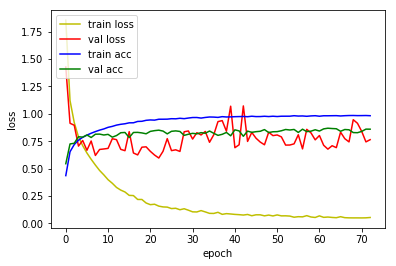

4815/4815 [==============================] - 6s 1ms/sample - loss: 0.7324 - acc: 0.8218
Loss: 0.7324441032060581 Accuracy: 0.82180685

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.9487 - acc: 0.3990
Epoch 00001: val_loss improved from inf to 1.35321, saving model to model/checkpoint/1D_CNN_custom_pool_2_DO_BN_8_conv_checkpoint/001-1.3532.hdf5
36805/36805 [==============================] - 136s 4ms/sample - loss: 1.9489 - acc: 0.3991 - val_loss: 1.3532 - val_acc: 0.5574
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.1530 - acc: 0.6386
Epoch 00002: val_loss improved from 1.35321 to 1.15159, saving model to model/checkpoint/1D_CNN_custom_pool_2_DO_BN_8_conv_checkpoint/002-1.1516.hdf5
36805/36805 [==============================] - 116s 3ms/sample - loss: 1.1529 - acc: 0.6386 - val_loss: 1.1516 - val_acc: 0.6473
Epoch 3/500
36800/36805 [============================>.] - ETA: 0s - l

36800/36805 [============================>.] - ETA: 0s - loss: 0.1463 - acc: 0.9533
Epoch 00026: val_loss did not improve from 0.39869
36805/36805 [==============================] - 115s 3ms/sample - loss: 0.1463 - acc: 0.9533 - val_loss: 0.4479 - val_acc: 0.8789
Epoch 27/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1306 - acc: 0.9580
Epoch 00027: val_loss did not improve from 0.39869
36805/36805 [==============================] - 115s 3ms/sample - loss: 0.1306 - acc: 0.9580 - val_loss: 0.4243 - val_acc: 0.8973
Epoch 28/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1287 - acc: 0.9583
Epoch 00028: val_loss did not improve from 0.39869
36805/36805 [==============================] - 115s 3ms/sample - loss: 0.1287 - acc: 0.9583 - val_loss: 0.5840 - val_acc: 0.8668
Epoch 29/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1174 - acc: 0.9639
Epoch 00029: val_loss did not improve from 0.39869
36805/36805 [=====================

36800/36805 [============================>.] - ETA: 0s - loss: 0.0600 - acc: 0.9814
Epoch 00055: val_loss did not improve from 0.37669
36805/36805 [==============================] - 115s 3ms/sample - loss: 0.0600 - acc: 0.9813 - val_loss: 0.5635 - val_acc: 0.8877
Epoch 56/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0625 - acc: 0.9810
Epoch 00056: val_loss did not improve from 0.37669
36805/36805 [==============================] - 115s 3ms/sample - loss: 0.0625 - acc: 0.9810 - val_loss: 0.4321 - val_acc: 0.9075
Epoch 57/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0496 - acc: 0.9842
Epoch 00057: val_loss did not improve from 0.37669
36805/36805 [==============================] - 115s 3ms/sample - loss: 0.0496 - acc: 0.9842 - val_loss: 0.4855 - val_acc: 0.9024
Epoch 58/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0483 - acc: 0.9853
Epoch 00058: val_loss did not improve from 0.37669
36805/36805 [=====================

Epoch 85/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0562 - acc: 0.9825
Epoch 00085: val_loss did not improve from 0.37669
36805/36805 [==============================] - 115s 3ms/sample - loss: 0.0562 - acc: 0.9825 - val_loss: 0.5145 - val_acc: 0.9059
Epoch 86/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0261 - acc: 0.9919
Epoch 00086: val_loss did not improve from 0.37669
36805/36805 [==============================] - 115s 3ms/sample - loss: 0.0261 - acc: 0.9919 - val_loss: 0.5277 - val_acc: 0.9008
Epoch 87/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0348 - acc: 0.9893
Epoch 00087: val_loss did not improve from 0.37669
36805/36805 [==============================] - 115s 3ms/sample - loss: 0.0350 - acc: 0.9893 - val_loss: 0.4635 - val_acc: 0.9103
Epoch 88/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0396 - acc: 0.9882
Epoch 00088: val_loss did not improve from 0.37669
36805/36805 [========

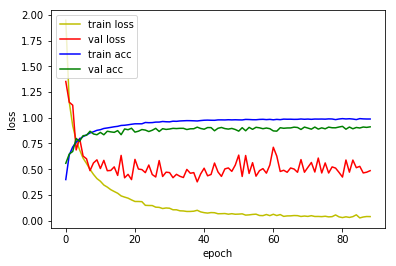

4815/4815 [==============================] - 6s 1ms/sample - loss: 0.4655 - acc: 0.8820
Loss: 0.4654835937550506 Accuracy: 0.8820353

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.8965 - acc: 0.4240
Epoch 00001: val_loss improved from inf to 1.40069, saving model to model/checkpoint/1D_CNN_custom_pool_2_DO_BN_9_conv_checkpoint/001-1.4007.hdf5
36805/36805 [==============================] - 143s 4ms/sample - loss: 1.8966 - acc: 0.4240 - val_loss: 1.4007 - val_acc: 0.5497
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.0625 - acc: 0.6727
Epoch 00002: val_loss improved from 1.40069 to 0.84915, saving model to model/checkpoint/1D_CNN_custom_pool_2_DO_BN_9_conv_checkpoint/002-0.8492.hdf5
36805/36805 [==============================] - 117s 3ms/sample - loss: 1.0626 - acc: 0.6726 - val_loss: 0.8492 - val_acc: 0.7473
Epoch 3/500
36800/36805 [============================>.] - ETA: 0s - lo

36800/36805 [============================>.] - ETA: 0s - loss: 0.0927 - acc: 0.9696
Epoch 00026: val_loss did not improve from 0.27686
36805/36805 [==============================] - 117s 3ms/sample - loss: 0.0927 - acc: 0.9696 - val_loss: 0.3529 - val_acc: 0.9157
Epoch 27/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0857 - acc: 0.9713
Epoch 00027: val_loss did not improve from 0.27686
36805/36805 [==============================] - 117s 3ms/sample - loss: 0.0857 - acc: 0.9713 - val_loss: 0.3355 - val_acc: 0.9201
Epoch 28/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0779 - acc: 0.9750
Epoch 00028: val_loss did not improve from 0.27686
36805/36805 [==============================] - 117s 3ms/sample - loss: 0.0779 - acc: 0.9750 - val_loss: 0.3333 - val_acc: 0.9208
Epoch 29/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0707 - acc: 0.9779
Epoch 00029: val_loss did not improve from 0.27686
36805/36805 [=====================

Epoch 56/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0362 - acc: 0.9883
Epoch 00056: val_loss did not improve from 0.27686
36805/36805 [==============================] - 117s 3ms/sample - loss: 0.0362 - acc: 0.9883 - val_loss: 0.3945 - val_acc: 0.9262
Epoch 57/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0298 - acc: 0.9902
Epoch 00057: val_loss did not improve from 0.27686
36805/36805 [==============================] - 117s 3ms/sample - loss: 0.0298 - acc: 0.9902 - val_loss: 0.4944 - val_acc: 0.8998
Epoch 58/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0335 - acc: 0.9900
Epoch 00058: val_loss did not improve from 0.27686
36805/36805 [==============================] - 117s 3ms/sample - loss: 0.0335 - acc: 0.9900 - val_loss: 0.3622 - val_acc: 0.9243
Epoch 59/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0348 - acc: 0.9895
Epoch 00059: val_loss did not improve from 0.27686
36805/36805 [========

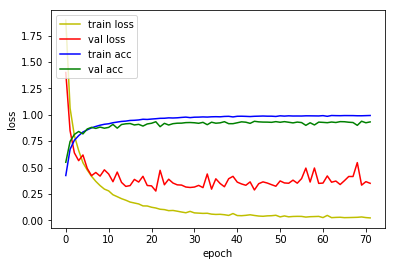

4815/4815 [==============================] - 7s 1ms/sample - loss: 0.3272 - acc: 0.9092
Loss: 0.32718686868406655 Accuracy: 0.909242

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.8523 - acc: 0.4335
Epoch 00001: val_loss improved from inf to 1.18483, saving model to model/checkpoint/1D_CNN_custom_pool_2_DO_BN_10_conv_checkpoint/001-1.1848.hdf5
36805/36805 [==============================] - 153s 4ms/sample - loss: 1.8523 - acc: 0.4335 - val_loss: 1.1848 - val_acc: 0.6303
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.9581 - acc: 0.7049
Epoch 00002: val_loss improved from 1.18483 to 0.70324, saving model to model/checkpoint/1D_CNN_custom_pool_2_DO_BN_10_conv_checkpoint/002-0.7032.hdf5
36805/36805 [==============================] - 119s 3ms/sample - loss: 0.9580 - acc: 0.7049 - val_loss: 0.7032 - val_acc: 0.7945
Epoch 3/500
36800/36805 [============================>.] - ETA: 0s - 

Epoch 26/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0767 - acc: 0.9754
Epoch 00026: val_loss improved from 0.21139 to 0.19087, saving model to model/checkpoint/1D_CNN_custom_pool_2_DO_BN_10_conv_checkpoint/026-0.1909.hdf5
36805/36805 [==============================] - 118s 3ms/sample - loss: 0.0767 - acc: 0.9754 - val_loss: 0.1909 - val_acc: 0.9534
Epoch 27/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0556 - acc: 0.9820
Epoch 00027: val_loss did not improve from 0.19087
36805/36805 [==============================] - 118s 3ms/sample - loss: 0.0556 - acc: 0.9820 - val_loss: 0.2321 - val_acc: 0.9448
Epoch 28/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0609 - acc: 0.9804
Epoch 00028: val_loss did not improve from 0.19087
36805/36805 [==============================] - 118s 3ms/sample - loss: 0.0609 - acc: 0.9804 - val_loss: 0.2090 - val_acc: 0.9502
Epoch 29/500
36800/36805 [============================>.] - ETA: 0s -

Epoch 55/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0293 - acc: 0.9910
Epoch 00055: val_loss did not improve from 0.18329
36805/36805 [==============================] - 118s 3ms/sample - loss: 0.0293 - acc: 0.9910 - val_loss: 0.2446 - val_acc: 0.9488
Epoch 56/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0150 - acc: 0.9954
Epoch 00056: val_loss did not improve from 0.18329
36805/36805 [==============================] - 118s 3ms/sample - loss: 0.0150 - acc: 0.9954 - val_loss: 0.2486 - val_acc: 0.9532
Epoch 57/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0219 - acc: 0.9929
Epoch 00057: val_loss did not improve from 0.18329
36805/36805 [==============================] - 118s 3ms/sample - loss: 0.0225 - acc: 0.9928 - val_loss: 0.2929 - val_acc: 0.9411
Epoch 58/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0429 - acc: 0.9868
Epoch 00058: val_loss did not improve from 0.18329
36805/36805 [========

Epoch 85/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0182 - acc: 0.9941
Epoch 00085: val_loss did not improve from 0.18329
36805/36805 [==============================] - 118s 3ms/sample - loss: 0.0182 - acc: 0.9941 - val_loss: 0.2679 - val_acc: 0.9525
Epoch 86/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0137 - acc: 0.9956
Epoch 00086: val_loss did not improve from 0.18329
36805/36805 [==============================] - 118s 3ms/sample - loss: 0.0137 - acc: 0.9956 - val_loss: 0.2332 - val_acc: 0.9536
Epoch 87/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0121 - acc: 0.9962
Epoch 00087: val_loss did not improve from 0.18329
36805/36805 [==============================] - 118s 3ms/sample - loss: 0.0121 - acc: 0.9962 - val_loss: 0.2087 - val_acc: 0.9571
Epoch 88/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0212 - acc: 0.9935
Epoch 00088: val_loss improved from 0.18329 to 0.18238, saving model to 

36800/36805 [============================>.] - ETA: 0s - loss: 0.0109 - acc: 0.9966
Epoch 00114: val_loss did not improve from 0.18238
36805/36805 [==============================] - 118s 3ms/sample - loss: 0.0111 - acc: 0.9965 - val_loss: 0.2405 - val_acc: 0.9581
Epoch 115/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0221 - acc: 0.9934
Epoch 00115: val_loss did not improve from 0.18238
36805/36805 [==============================] - 118s 3ms/sample - loss: 0.0221 - acc: 0.9934 - val_loss: 0.2303 - val_acc: 0.9562
Epoch 116/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0063 - acc: 0.9981
Epoch 00116: val_loss did not improve from 0.18238
36805/36805 [==============================] - 118s 3ms/sample - loss: 0.0063 - acc: 0.9981 - val_loss: 0.2530 - val_acc: 0.9571
Epoch 117/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0071 - acc: 0.9981
Epoch 00117: val_loss did not improve from 0.18238
36805/36805 [==================

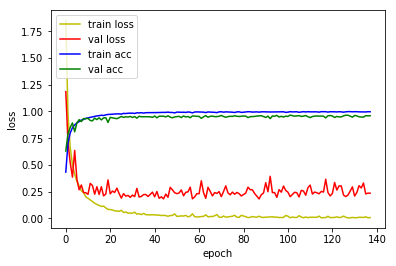

4815/4815 [==============================] - 7s 1ms/sample - loss: 0.2416 - acc: 0.9497
Loss: 0.2416394650371337 Accuracy: 0.9497404

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.8434 - acc: 0.4337
Epoch 00001: val_loss improved from inf to 1.28135, saving model to model/checkpoint/1D_CNN_custom_pool_2_DO_BN_11_conv_checkpoint/001-1.2814.hdf5
36805/36805 [==============================] - 161s 4ms/sample - loss: 1.8433 - acc: 0.4337 - val_loss: 1.2814 - val_acc: 0.5872
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.8296 - acc: 0.7442
Epoch 00002: val_loss improved from 1.28135 to 0.53162, saving model to model/checkpoint/1D_CNN_custom_pool_2_DO_BN_11_conv_checkpoint/002-0.5316.hdf5
36805/36805 [==============================] - 120s 3ms/sample - loss: 0.8298 - acc: 0.7441 - val_loss: 0.5316 - val_acc: 0.8402
Epoch 3/500
36800/36805 [============================>.] - ETA: 0s - 

36800/36805 [============================>.] - ETA: 0s - loss: 0.0435 - acc: 0.9859
Epoch 00027: val_loss did not improve from 0.12182
36805/36805 [==============================] - 119s 3ms/sample - loss: 0.0435 - acc: 0.9858 - val_loss: 0.1823 - val_acc: 0.9567
Epoch 28/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0522 - acc: 0.9824
Epoch 00028: val_loss did not improve from 0.12182
36805/36805 [==============================] - 120s 3ms/sample - loss: 0.0522 - acc: 0.9824 - val_loss: 0.1398 - val_acc: 0.9644
Epoch 29/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0371 - acc: 0.9881
Epoch 00029: val_loss did not improve from 0.12182
36805/36805 [==============================] - 120s 3ms/sample - loss: 0.0371 - acc: 0.9881 - val_loss: 0.1529 - val_acc: 0.9539
Epoch 30/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0368 - acc: 0.9885
Epoch 00030: val_loss did not improve from 0.12182
36805/36805 [=====================

Epoch 57/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0143 - acc: 0.9955
Epoch 00057: val_loss did not improve from 0.12182
36805/36805 [==============================] - 119s 3ms/sample - loss: 0.0143 - acc: 0.9955 - val_loss: 0.2055 - val_acc: 0.9546
Epoch 58/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0180 - acc: 0.9944
Epoch 00058: val_loss did not improve from 0.12182
36805/36805 [==============================] - 119s 3ms/sample - loss: 0.0183 - acc: 0.9943 - val_loss: 0.2289 - val_acc: 0.9567
Epoch 59/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0247 - acc: 0.9922
Epoch 00059: val_loss did not improve from 0.12182
36805/36805 [==============================] - 119s 3ms/sample - loss: 0.0248 - acc: 0.9921 - val_loss: 0.1798 - val_acc: 0.9627
Epoch 60/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0186 - acc: 0.9940
Epoch 00060: val_loss did not improve from 0.12182
36805/36805 [========

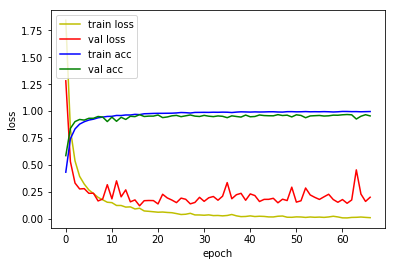

4815/4815 [==============================] - 8s 2ms/sample - loss: 0.1556 - acc: 0.9524
Loss: 0.15557638902839965 Accuracy: 0.95244026

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.7025 - acc: 0.4802
Epoch 00001: val_loss improved from inf to 0.93837, saving model to model/checkpoint/1D_CNN_custom_pool_2_DO_BN_12_conv_checkpoint/001-0.9384.hdf5
36805/36805 [==============================] - 173s 5ms/sample - loss: 1.7024 - acc: 0.4802 - val_loss: 0.9384 - val_acc: 0.7254
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.6814 - acc: 0.7883
Epoch 00002: val_loss improved from 0.93837 to 0.42639, saving model to model/checkpoint/1D_CNN_custom_pool_2_DO_BN_12_conv_checkpoint/002-0.4264.hdf5
36805/36805 [==============================] - 121s 3ms/sample - loss: 0.6815 - acc: 0.7882 - val_loss: 0.4264 - val_acc: 0.8654
Epoch 3/500
36800/36805 [============================>.] - ETA: 0s 

Epoch 26/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0525 - acc: 0.9832
Epoch 00026: val_loss did not improve from 0.10959
36805/36805 [==============================] - 121s 3ms/sample - loss: 0.0526 - acc: 0.9832 - val_loss: 0.1738 - val_acc: 0.9555
Epoch 27/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0460 - acc: 0.9852
Epoch 00027: val_loss did not improve from 0.10959
36805/36805 [==============================] - 121s 3ms/sample - loss: 0.0460 - acc: 0.9852 - val_loss: 0.2052 - val_acc: 0.9390
Epoch 28/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0331 - acc: 0.9903
Epoch 00028: val_loss did not improve from 0.10959
36805/36805 [==============================] - 121s 3ms/sample - loss: 0.0332 - acc: 0.9903 - val_loss: 0.2156 - val_acc: 0.9411
Epoch 29/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0444 - acc: 0.9864
Epoch 00029: val_loss did not improve from 0.10959
36805/36805 [========

36800/36805 [============================>.] - ETA: 0s - loss: 0.0251 - acc: 0.9924
Epoch 00055: val_loss did not improve from 0.10923
36805/36805 [==============================] - 121s 3ms/sample - loss: 0.0251 - acc: 0.9924 - val_loss: 0.1509 - val_acc: 0.9667
Epoch 56/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0091 - acc: 0.9975
Epoch 00056: val_loss did not improve from 0.10923
36805/36805 [==============================] - 121s 3ms/sample - loss: 0.0091 - acc: 0.9975 - val_loss: 0.1665 - val_acc: 0.9667
Epoch 57/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0096 - acc: 0.9972
Epoch 00057: val_loss did not improve from 0.10923
36805/36805 [==============================] - 121s 3ms/sample - loss: 0.0096 - acc: 0.9971 - val_loss: 0.1599 - val_acc: 0.9623
Epoch 58/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0183 - acc: 0.9940
Epoch 00058: val_loss did not improve from 0.10923
36805/36805 [=====================

Epoch 85/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0124 - acc: 0.9962
Epoch 00085: val_loss did not improve from 0.10923
36805/36805 [==============================] - 121s 3ms/sample - loss: 0.0124 - acc: 0.9962 - val_loss: 0.1299 - val_acc: 0.9727
Epoch 86/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0041 - acc: 0.9987
Epoch 00086: val_loss did not improve from 0.10923
36805/36805 [==============================] - 121s 3ms/sample - loss: 0.0041 - acc: 0.9987 - val_loss: 0.1191 - val_acc: 0.9723
Epoch 87/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0068 - acc: 0.9980
Epoch 00087: val_loss did not improve from 0.10923
36805/36805 [==============================] - 121s 3ms/sample - loss: 0.0068 - acc: 0.9980 - val_loss: 0.1300 - val_acc: 0.9706

1D_CNN_custom_pool_2_DO_BN_12_conv Model


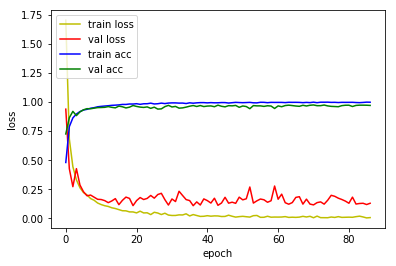

4815/4815 [==============================] - 8s 2ms/sample - loss: 0.1492 - acc: 0.9574
Loss: 0.14923871945887648 Accuracy: 0.9574247

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.3896 - acc: 0.5796
Epoch 00001: val_loss improved from inf to 0.65481, saving model to model/checkpoint/1D_CNN_custom_pool_2_DO_BN_13_conv_checkpoint/001-0.6548.hdf5
36805/36805 [==============================] - 183s 5ms/sample - loss: 1.3895 - acc: 0.5796 - val_loss: 0.6548 - val_acc: 0.8027
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.5061 - acc: 0.8431
Epoch 00002: val_loss improved from 0.65481 to 0.33597, saving model to model/checkpoint/1D_CNN_custom_pool_2_DO_BN_13_conv_checkpoint/002-0.3360.hdf5
36805/36805 [==============================] - 123s 3ms/sample - loss: 0.5061 - acc: 0.8431 - val_loss: 0.3360 - val_acc: 0.8998
Epoch 3/500
36800/36805 [============================>.] - ETA: 0s -

Epoch 26/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0307 - acc: 0.9906
Epoch 00026: val_loss improved from 0.12897 to 0.12780, saving model to model/checkpoint/1D_CNN_custom_pool_2_DO_BN_13_conv_checkpoint/026-0.1278.hdf5
36805/36805 [==============================] - 122s 3ms/sample - loss: 0.0307 - acc: 0.9906 - val_loss: 0.1278 - val_acc: 0.9679
Epoch 27/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0352 - acc: 0.9889
Epoch 00027: val_loss did not improve from 0.12780
36805/36805 [==============================] - 122s 3ms/sample - loss: 0.0352 - acc: 0.9889 - val_loss: 0.1880 - val_acc: 0.9560
Epoch 28/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0274 - acc: 0.9914
Epoch 00028: val_loss did not improve from 0.12780
36805/36805 [==============================] - 122s 3ms/sample - loss: 0.0274 - acc: 0.9914 - val_loss: 0.1657 - val_acc: 0.9616
Epoch 29/500
36800/36805 [============================>.] - ETA: 0s -

Epoch 55/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0067 - acc: 0.9979
Epoch 00055: val_loss did not improve from 0.11378
36805/36805 [==============================] - 122s 3ms/sample - loss: 0.0067 - acc: 0.9979 - val_loss: 0.1743 - val_acc: 0.9606
Epoch 56/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0094 - acc: 0.9971
Epoch 00056: val_loss did not improve from 0.11378
36805/36805 [==============================] - 122s 3ms/sample - loss: 0.0094 - acc: 0.9971 - val_loss: 0.1365 - val_acc: 0.9693
Epoch 57/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0148 - acc: 0.9958
Epoch 00057: val_loss did not improve from 0.11378
36805/36805 [==============================] - 122s 3ms/sample - loss: 0.0149 - acc: 0.9958 - val_loss: 0.1738 - val_acc: 0.9625
Epoch 58/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0220 - acc: 0.9933
Epoch 00058: val_loss did not improve from 0.11378
36805/36805 [========

Epoch 85/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0079 - acc: 0.9974
Epoch 00085: val_loss did not improve from 0.11378
36805/36805 [==============================] - 122s 3ms/sample - loss: 0.0078 - acc: 0.9974 - val_loss: 0.1516 - val_acc: 0.9662
Epoch 86/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0041 - acc: 0.9988
Epoch 00086: val_loss did not improve from 0.11378
36805/36805 [==============================] - 122s 3ms/sample - loss: 0.0041 - acc: 0.9988 - val_loss: 0.1864 - val_acc: 0.9630
Epoch 87/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0052 - acc: 0.9984
Epoch 00087: val_loss did not improve from 0.11378
36805/36805 [==============================] - 122s 3ms/sample - loss: 0.0054 - acc: 0.9983 - val_loss: 0.1631 - val_acc: 0.9648
Epoch 88/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0238 - acc: 0.9937
Epoch 00088: val_loss did not improve from 0.11378
36805/36805 [========

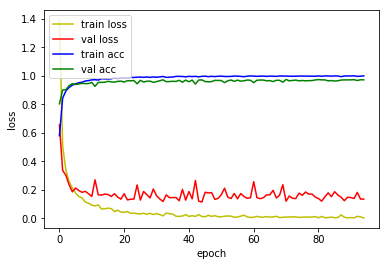

4815/4815 [==============================] - 8s 2ms/sample - loss: 0.1541 - acc: 0.9630
Loss: 0.1540566892566465 Accuracy: 0.9630322



In [10]:
base = '1D_CNN_custom_pool_2_DO_BN'

for i in range(3, 14):
    model_name = base+'_{}_conv'.format(i)
    model = build_1d_cnn_custom_DO_BN(conv_num=i)
#         model.summary()
    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-4),
          metrics=['accuracy'])
    model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
    os.makedirs(model_path, exist_ok=True)
    model_filename = model_path+'{epoch:03d}-{val_loss:.4f}.hdf5'
    checkpointer = ModelCheckpoint(filepath = model_filename, monitor = "val_loss", 
                                   verbose=1, save_best_only=True)

    early_stopping = EarlyStopping(monitor='val_loss', patience=50)
    hist = model.fit(x_train_abs, y_train_onehot, batch_size=64, epochs=500, 
                     validation_data=[x_val_abs, y_val_onehot], shuffle=True, 
                     callbacks = [checkpointer, early_stopping])

    print()
    print(model_name, 'Model')
    fig, ax = plt.subplots()
    ax.plot(hist.history['loss'], 'y', label='train loss')
    ax.plot(hist.history['val_loss'], 'r', label='val loss')
    ax.plot(hist.history['acc'], 'b', label='train acc')
    ax.plot(hist.history['val_acc'], 'g', label='val acc')
    ax.set_xlabel('epoch')
    ax.set_ylabel('loss')
    ax.legend(loc='upper left')
    plt.show()

    png_path = 'visualization/learning_curve/'
    filename = model_name+'.png'
    os.makedirs(png_path, exist_ok=True)
    fig.savefig(png_path+filename, transparent=True)

    model.save(model_path+'000_last.hdf5')
    del(model)
    
    model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
    model_filename = model_path + sorted(os.listdir(model_path))[-1]
    model = load_model(model_filename)
    [loss, accuracy] = model.evaluate(x_test_abs, y_test_onehot)
    print('Loss:', loss, 'Accuracy:', accuracy)
    print()

    del(model)

In [11]:
log_dir = 'log'
os.makedirs(log_dir, exist_ok=True)
base = '1D_CNN_custom_pool_2_DO_BN'

with open(path.join(log_dir, base), 'w') as log_file:
    for i in range(3, 14):
        model_name = base+'_{}_conv'.format(i)
        print()
        print(model_name, 'Model')
        model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
        model_filename = model_path + sorted(os.listdir(model_path))[-1]

        model = load_model(model_filename)
        model.summary()

        [loss, accuracy] = model.evaluate(x_test_abs, y_test_onehot)
        print('Loss:', loss, 'Accuracy:', accuracy)

        del(model)

        log_file.write('\t'.join([model_name, str(accuracy), str(loss)])+'\n')


1D_CNN_custom_pool_2_DO_BN_3_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_88 (Conv1D)           (None, 16000, 64)         384       
_________________________________________________________________
batch_normalization_v1_88 (B (None, 16000, 64)         256       
_________________________________________________________________
activation_88 (Activation)   (None, 16000, 64)         0         
_________________________________________________________________
conv1d_89 (Conv1D)           (None, 16000, 64)         20544     
_________________________________________________________________
batch_normalization_v1_89 (B (None, 16000, 64)         256       
_________________________________________________________________
activation_89 (Activation)   (None, 16000, 64)         0         
_________________________________________________________________
max_pooling1d_77 (MaxPooling (None,

4815/4815 [==============================] - 7s 2ms/sample - loss: 1.3127 - acc: 0.6222
Loss: 1.3126934542710411 Accuracy: 0.62222224

1D_CNN_custom_pool_2_DO_BN_6_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_100 (Conv1D)          (None, 16000, 64)         384       
_________________________________________________________________
batch_normalization_v1_100 ( (None, 16000, 64)         256       
_________________________________________________________________
activation_100 (Activation)  (None, 16000, 64)         0         
_________________________________________________________________
conv1d_101 (Conv1D)          (None, 16000, 64)         20544     
_________________________________________________________________
batch_normalization_v1_101 ( (None, 16000, 64)         256       
_________________________________________________________________
activation_101 (Activation)  (Non

4815/4815 [==============================] - 8s 2ms/sample - loss: 0.7324 - acc: 0.8218
Loss: 0.7324441032060581 Accuracy: 0.82180685

1D_CNN_custom_pool_2_DO_BN_8_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_113 (Conv1D)          (None, 16000, 64)         384       
_________________________________________________________________
batch_normalization_v1_113 ( (None, 16000, 64)         256       
_________________________________________________________________
activation_113 (Activation)  (None, 16000, 64)         0         
_________________________________________________________________
conv1d_114 (Conv1D)          (None, 16000, 64)         20544     
_________________________________________________________________
batch_normalization_v1_114 ( (None, 16000, 64)         256       
_________________________________________________________________
activation_114 (Activation)  (Non

4815/4815 [==============================] - 9s 2ms/sample - loss: 0.3272 - acc: 0.9092
Loss: 0.32718686868406655 Accuracy: 0.909242

1D_CNN_custom_pool_2_DO_BN_10_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_130 (Conv1D)          (None, 16000, 64)         384       
_________________________________________________________________
batch_normalization_v1_130 ( (None, 16000, 64)         256       
_________________________________________________________________
activation_130 (Activation)  (None, 16000, 64)         0         
_________________________________________________________________
conv1d_131 (Conv1D)          (None, 16000, 64)         20544     
_________________________________________________________________
batch_normalization_v1_131 ( (None, 16000, 64)         256       
_________________________________________________________________
activation_131 (Activation)  (Non

4815/4815 [==============================] - 9s 2ms/sample - loss: 0.1556 - acc: 0.9524
Loss: 0.15557638902839965 Accuracy: 0.95244026

1D_CNN_custom_pool_2_DO_BN_12_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_151 (Conv1D)          (None, 16000, 64)         384       
_________________________________________________________________
batch_normalization_v1_151 ( (None, 16000, 64)         256       
_________________________________________________________________
activation_151 (Activation)  (None, 16000, 64)         0         
_________________________________________________________________
conv1d_152 (Conv1D)          (None, 16000, 64)         20544     
_________________________________________________________________
batch_normalization_v1_152 ( (None, 16000, 64)         256       
_________________________________________________________________
activation_152 (Activation)  (N

4815/4815 [==============================] - 10s 2ms/sample - loss: 0.1541 - acc: 0.9630
Loss: 0.1540566892566465 Accuracy: 0.9630322


In [12]:
# log_dir = 'log'
# os.makedirs(log_dir, exist_ok=True)
# base = '1D_CNN_custom_DO_BN'

# with open(path.join(log_dir, base), 'w') as log_file:
for i in range(3, 14):
    model_name = base+'_{}_conv'.format(i)
    print()
    print(model_name, 'Model')
    model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
    model_filename = model_path + '000_last.hdf5'

    model = load_model(model_filename)
    model.summary()

    [loss, accuracy] = model.evaluate(x_test_abs, y_test_onehot)
    print('Loss:', loss, 'Accuracy:', accuracy)

    del(model)

#         log_file.write('\t'.join([model_name, str(accuracy), str(loss)])+'\n')


1D_CNN_custom_pool_2_DO_BN_3_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_88 (Conv1D)           (None, 16000, 64)         384       
_________________________________________________________________
batch_normalization_v1_88 (B (None, 16000, 64)         256       
_________________________________________________________________
activation_88 (Activation)   (None, 16000, 64)         0         
_________________________________________________________________
conv1d_89 (Conv1D)           (None, 16000, 64)         20544     
_________________________________________________________________
batch_normalization_v1_89 (B (None, 16000, 64)         256       
_________________________________________________________________
activation_89 (Activation)   (None, 16000, 64)         0         
_________________________________________________________________
max_pooling1d_77 (MaxPooling (None,

4815/4815 [==============================] - 10s 2ms/sample - loss: 1.9202 - acc: 0.7026
Loss: 1.9202102008514563 Accuracy: 0.70259607

1D_CNN_custom_pool_2_DO_BN_6_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_100 (Conv1D)          (None, 16000, 64)         384       
_________________________________________________________________
batch_normalization_v1_100 ( (None, 16000, 64)         256       
_________________________________________________________________
activation_100 (Activation)  (None, 16000, 64)         0         
_________________________________________________________________
conv1d_101 (Conv1D)          (None, 16000, 64)         20544     
_________________________________________________________________
batch_normalization_v1_101 ( (None, 16000, 64)         256       
_________________________________________________________________
activation_101 (Activation)  (No

4815/4815 [==============================] - 10s 2ms/sample - loss: 0.9249 - acc: 0.8197
Loss: 0.9248774629020493 Accuracy: 0.81973

1D_CNN_custom_pool_2_DO_BN_8_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_113 (Conv1D)          (None, 16000, 64)         384       
_________________________________________________________________
batch_normalization_v1_113 ( (None, 16000, 64)         256       
_________________________________________________________________
activation_113 (Activation)  (None, 16000, 64)         0         
_________________________________________________________________
conv1d_114 (Conv1D)          (None, 16000, 64)         20544     
_________________________________________________________________
batch_normalization_v1_114 ( (None, 16000, 64)         256       
_________________________________________________________________
activation_114 (Activation)  (None,

4815/4815 [==============================] - 10s 2ms/sample - loss: 0.4588 - acc: 0.9107
Loss: 0.45877491665853193 Accuracy: 0.91069573

1D_CNN_custom_pool_2_DO_BN_10_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_130 (Conv1D)          (None, 16000, 64)         384       
_________________________________________________________________
batch_normalization_v1_130 ( (None, 16000, 64)         256       
_________________________________________________________________
activation_130 (Activation)  (None, 16000, 64)         0         
_________________________________________________________________
conv1d_131 (Conv1D)          (None, 16000, 64)         20544     
_________________________________________________________________
batch_normalization_v1_131 ( (None, 16000, 64)         256       
_________________________________________________________________
activation_131 (Activation)  (

4815/4815 [==============================] - 11s 2ms/sample - loss: 0.2276 - acc: 0.9460
Loss: 0.22758685567281822 Accuracy: 0.94600207

1D_CNN_custom_pool_2_DO_BN_12_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_151 (Conv1D)          (None, 16000, 64)         384       
_________________________________________________________________
batch_normalization_v1_151 ( (None, 16000, 64)         256       
_________________________________________________________________
activation_151 (Activation)  (None, 16000, 64)         0         
_________________________________________________________________
conv1d_152 (Conv1D)          (None, 16000, 64)         20544     
_________________________________________________________________
batch_normalization_v1_152 ( (None, 16000, 64)         256       
_________________________________________________________________
activation_152 (Activation)  (

4815/4815 [==============================] - 12s 2ms/sample - loss: 0.1556 - acc: 0.9639
Loss: 0.15560738798055296 Accuracy: 0.96386296
